In [1]:
#Beschreibung: Analyse von Finanzdaten mit Python

In [2]:
#Import der Libraries

import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
portfolio = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [4]:
start = "2018-01-01"
end = "2020-01-01"

In [5]:
FB = web.DataReader("FB", data_source="yahoo", start=start, end=end)

In [6]:
FB["Adj Close"]

Date
2018-01-02    181.419998
2018-01-03    184.669998
2018-01-04    184.330002
2018-01-05    186.850006
2018-01-08    188.279999
                 ...    
2019-12-24    205.119995
2019-12-26    207.789993
2019-12-27    208.100006
2019-12-30    204.410004
2019-12-31    205.250000
Name: Adj Close, Length: 503, dtype: float64

In [7]:
df = pd.DataFrame()

In [8]:
for asset in portfolio:
    df[asset] = web.DataReader(asset, data_source="yahoo", start=start, end=end)["Adj Close"]
    
df 

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2018-01-02,181.419998,1189.010010,41.075405,201.070007,1065.000000
2018-01-03,184.669998,1204.199951,41.068253,205.050003,1082.479980
2018-01-04,184.330002,1209.589966,41.259007,205.630005,1086.400024
2018-01-05,186.850006,1229.140015,41.728752,209.990005,1102.229980
2018-01-08,188.279999,1246.869995,41.573761,212.050003,1106.939941
...,...,...,...,...,...
2019-12-24,205.119995,1789.209961,69.835602,333.200012,1343.560059
2019-12-26,207.789993,1868.770020,71.221153,332.630005,1360.400024
2019-12-27,208.100006,1869.800049,71.194153,329.089996,1351.890015


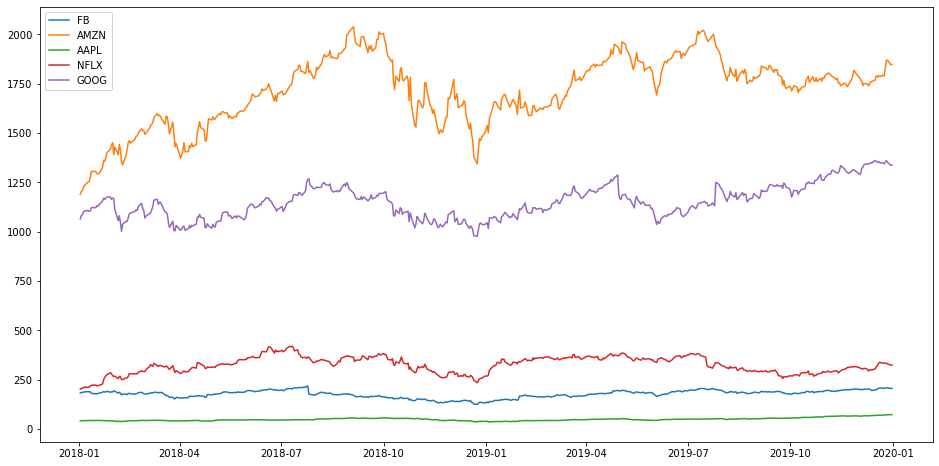

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df);
plt.legend(df.columns.values);

In [10]:
df.pct_change().describe()

,FB,AMZN,AAPL,NFLX,GOOG
count,502.000000,502.000000,502.000000,502.000000,502.000000
mean,0.000471,0.001060,0.001273,0.001278,0.000589
std,0.021017,0.019027,0.017341,0.025710,0.016501
min,-0.189609,-0.078197,-0.099607,-0.102720,-0.076966
25%,-0.008989,-0.007011,-0.006521,-0.012773,-0.006513
50%,0.000976,0.001507,0.001608,0.000598,0.000644
75%,0.011516,0.010706,0.010309,0.016836,0.009819
max,0.108164,0.094452,0.070422,0.099789,0.104485


In [11]:
df.pct_change().corr()

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.588643,0.455734,0.457141,0.598848
AMZN,0.588643,1.000000,0.622053,0.665228,0.692598
AAPL,0.455734,0.622053,1.000000,0.476121,0.626667
NFLX,0.457141,0.665228,0.476121,1.000000,0.567609
GOOG,0.598848,0.692598,0.626667,0.567609,1.000000


In [12]:
df.pct_change().cov()*252 #252 Handelstage im Jahr(bankwesen)

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.111311,0.059317,0.041857,0.062248,0.052336
AMZN,0.059317,0.091226,0.051721,0.082004,0.054796
AAPL,0.041857,0.051721,0.075782,0.053494,0.045189
NFLX,0.062248,0.082004,0.053494,0.166576,0.060683
GOOG,0.052336,0.054796,0.045189,0.060683,0.068616


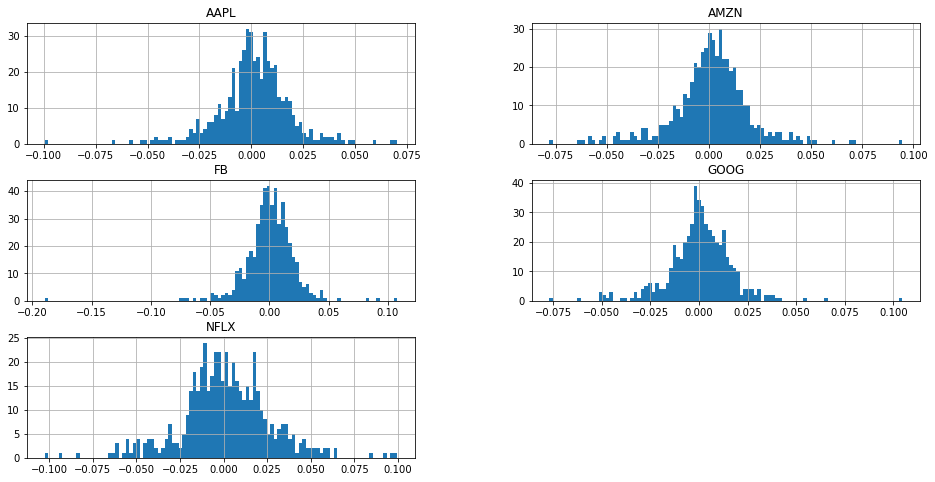

In [13]:
df.pct_change().hist(bins=100,figsize=(16,8));